In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re

# Download VADER Lexicon
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# Load review text file
file_path = "Cleaned_Waltham_reviews_utf8.txt"  # Replace with your actual file path
with open(file_path, "r", encoding="utf-8") as file:
    reviews_text = file.read()

# Define product keywords
product_keywords = {
    "bin washing": ["bin washing", "bin cleaning", "washing", "wash"],
    "caretaking": ["caretaking", "floor cleaning", "window cleaning", "litter picking", "graffiti removal", "clean offcie building", "office cleaning", "clean office", "cleaning", "office space", "apartment cleaning", "apartment"],
    "retrofit services": ["retrofit", "insulation", "draught proofing","heating controls", "heating system", "heating", "solar", "renewable energy", "energy"],
    "gardening services": ["gardening", "garden services", "mowing", "landscaping"],
    "general repairs and maintenance": ["repairs", "maintenance", "fixing", "painting", "tiling", "fitting shelves", "decoration", "decorating"],
    "grounds maintenance": ["grounds maintenance", "grimebuster", "cleaning grounds", "dirty hotspot", "grease"],
    "pest control": ["pest control", "fumigation", "rats", "mice", "infestation"],
    "property and garden clearance": ["property clearance", "garden clearance", "rubbish removal"],
    "Japanese knotweed": ["knotweed", "Japanese knotweed"],
    "property renovation": ["renovation", "electrical", "roofing", "kitchen design", "house design", "bathroom"],
}

# Analyze reviews
def analyze_reviews(reviews, product_keywords):
    matched_reviews = []
    reviews = re.split(r"\n\s*\n", reviews.strip())  # Split reviews based on empty lines
    for review in reviews:
        review = review.strip()
        if not review or len(review.split()) < 3:  # Filter short or empty reviews
            continue

        # Sentiment analysis
        sentiment_scores = sia.polarity_scores(review)
        compound_score = sentiment_scores["compound"]
        sentiment_label = (
            "Positive" if compound_score >= 0.05 else
            "Negative" if compound_score <= -0.05 else "Neutral"
        )

        # Match keywords to services
        matched = False
        for service, keywords in product_keywords.items():
            if any(keyword.lower() in review.lower() for keyword in keywords):
                matched_reviews.append({
                    "Service": service,
                    "Review": review,
                    "Sentiment": sentiment_label,
                    "Compound Score": compound_score,
                })
                matched = True
                break

        # Default to "general repairs and maintenance" if no match
        if not matched:
            matched_reviews.append({
                "Service": "general repairs and maintenance",
                "Review": review,
                "Sentiment": sentiment_label,
                "Compound Score": compound_score,
            })

    return pd.DataFrame(matched_reviews)

# Perform sentiment analysis
df = analyze_reviews(reviews_text, product_keywords)

# Add star rating distribution (mock data)
rating_distribution = {
    "1 star": 37,
    "2 stars": 7,
    "3 stars": 13,
    "4 stars": 28,
    "5 stars": 435
}
total_reviews = sum(rating_distribution.values())

# Convert counts to percentages
rating_percentages = {rating: count / total_reviews * 100 for rating, count in rating_distribution.items()}

# Reconcile with review counts per service
service_review_counts = df["Service"].value_counts()
service_ratings = {}
for service, count in service_review_counts.items():
    service_ratings[service] = {
        rating: (count * (rating_count / total_reviews))
        for rating, rating_count in rating_distribution.items()
    }

# Convert service_ratings to DataFrame
service_ratings_df = pd.DataFrame(service_ratings).T
service_ratings_df.columns = ["1 star", "2 stars", "3 stars", "4 stars", "5 stars"]
service_ratings_df["Total"] = service_ratings_df.sum(axis=1)

# Convert to percentages
service_ratings_df_percent = service_ratings_df.div(service_ratings_df["Total"], axis=0) * 100




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Proressive\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


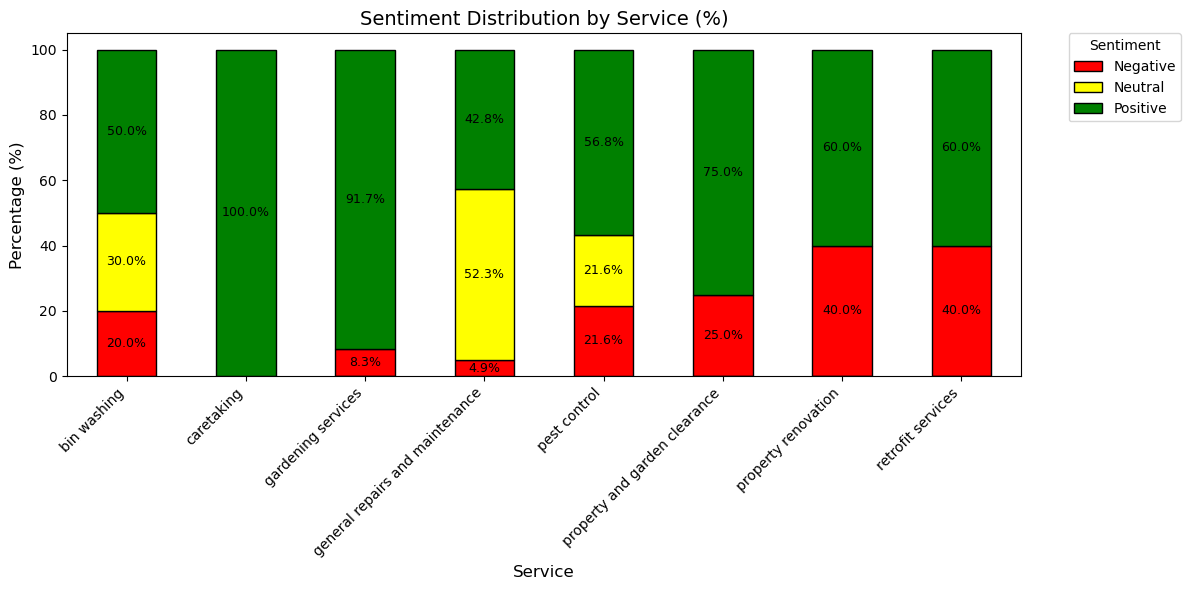

In [27]:
# Adjust legend placement to avoid overlapping with the chart
fig, ax = plt.subplots(figsize=(12, 6))
colors = ["red", "yellow", "green"]  # Colors for positive, neutral, and negative sentiments

bars = sentiment_summary.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=colors,
    ax=ax,
    edgecolor="black"
)

# Adding percentage labels to each section
for i, service in enumerate(sentiment_summary.index):
    cumulative_height = 0
    for j, sentiment in enumerate(sentiment_summary.columns):
        percentage = sentiment_summary.loc[service, sentiment]
        if percentage > 0:  # Avoid labeling zero-value sections
            ax.text(
                i, 
                cumulative_height + (percentage / 2),  # Position label in the middle of the section
                f"{percentage:.1f}%", 
                ha="center", 
                va="center", 
                fontsize=9,
                color="black"
            )
        cumulative_height += percentage  # Increment height for the next sentiment

# Adjust legend to be placed outside of the plot
ax.legend(
    title="Sentiment",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),  # Place outside the plot area
    borderaxespad=0
)

# Chart Formatting
plt.title("Sentiment Distribution by Service (%)", fontsize=14)
plt.xlabel("Service", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()


In [15]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.


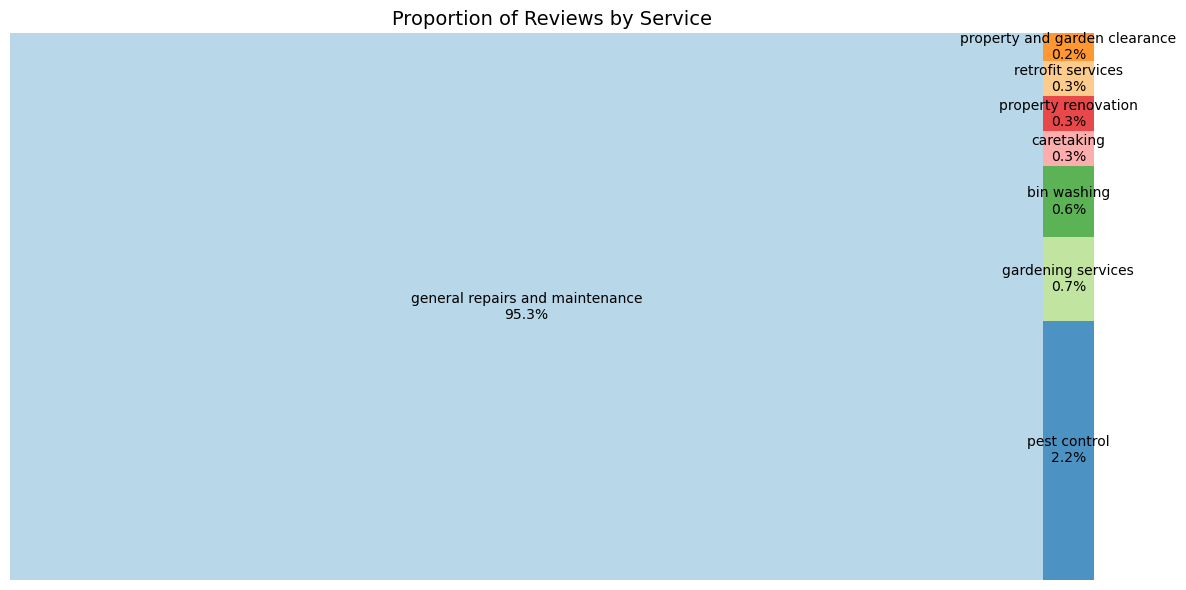

In [16]:
import squarify

# Create the treemap
sizes = service_review_counts.values
labels = [f"{service}\n{percentage:.1f}%" for service, percentage in zip(service_review_counts.index, service_review_percentages)]

plt.figure(figsize=(12, 6))
squarify.plot(sizes=sizes, label=labels, color=plt.cm.Paired.colors, alpha=0.8)
plt.title("Proportion of Reviews by Service", fontsize=14)
plt.axis("off")  # Turn off the axes
plt.tight_layout()
plt.show()


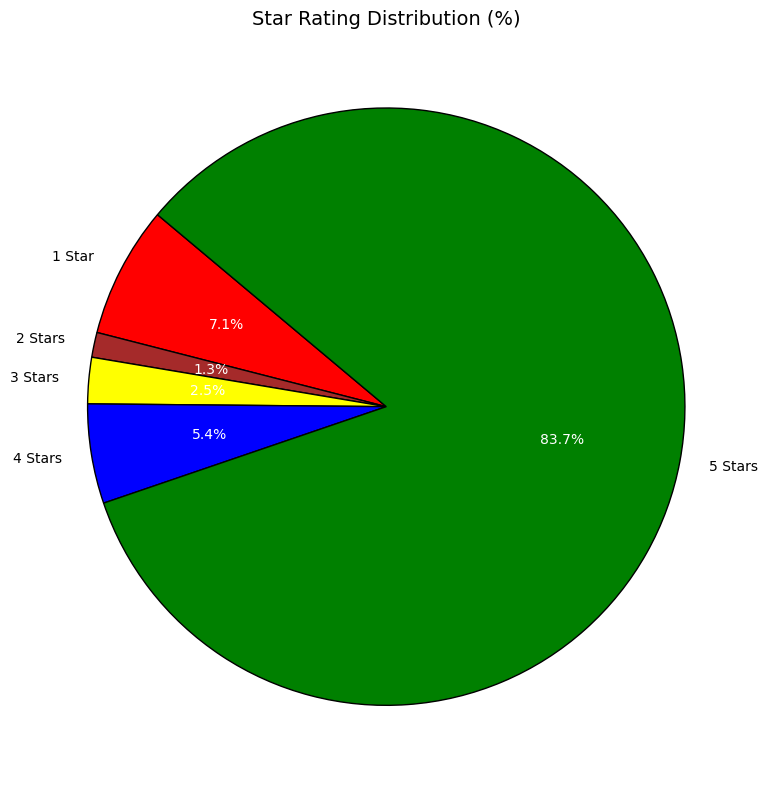

In [24]:
import matplotlib.pyplot as plt

# Star rating data
ratings = [37, 7, 13, 28, 435]  # Replace with your actual counts
labels = ["1 Star", "2 Stars", "3 Stars", "4 Stars", "5 Stars"]
colors = ["red", "brown", "yellow", "blue", "green"]  # Colors for each star rating

# Calculate percentages
total_reviews = sum(ratings)
percentages = [(count / total_reviews) * 100 for count in ratings]

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    ratings,
    labels=labels,
    autopct='%1.1f%%',  # Display percentage with one decimal
    startangle=140,  # Rotate for better layout
    colors=colors,
    wedgeprops={'edgecolor': 'black'},  # Add black edges to slices
    textprops={'fontsize': 10}  # Adjust font size for readability
)

# Style the percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

# Add title
plt.title("Star Rating Distribution (%)", fontsize=14)

# Display the pie chart
plt.tight_layout()
plt.show()
